**LOADING DATASET**

In [3]:
import pandas as pd

emp_data = pd.read_csv("E:\Final_Project_AI-Powered Talent Intelligence & Workforce\Dataset\IBM HR Analytics Attrition_Revised.csv")
emp_data.head()

<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Dharshini A\AppData\Local\Temp\ipykernel_5304\1935005077.py:3: SyntaxWarning: invalid escape sequence '\F'
  emp_data = pd.read_csv("E:\Final_Project_AI-Powered Talent Intelligence & Workforce\Dataset\IBM HR Analytics Attrition_Revised.csv")


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [4]:
# Print the shape of the DataFrame
print("The shape of data frame:", emp_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(emp_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(emp_data.columns))

The shape of data frame: (1470, 31)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 31


**LABEL ENCODING**

In [5]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables into numerical form.
label = LabelEncoder()
emp_data["Attrition"] = label.fit_transform(emp_data.Attrition)

In [6]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

**DATA PROCESSING**

In [7]:
# Transform categorical data into dummies
dummy_col = [column for column in emp_data.drop('Attrition', axis=1).columns if emp_data[column].nunique() < 20]
data = pd.get_dummies(emp_data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int32(1), int64(8), uint8(127)
memory usage: 280.1 KB


In [8]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<Axes: >

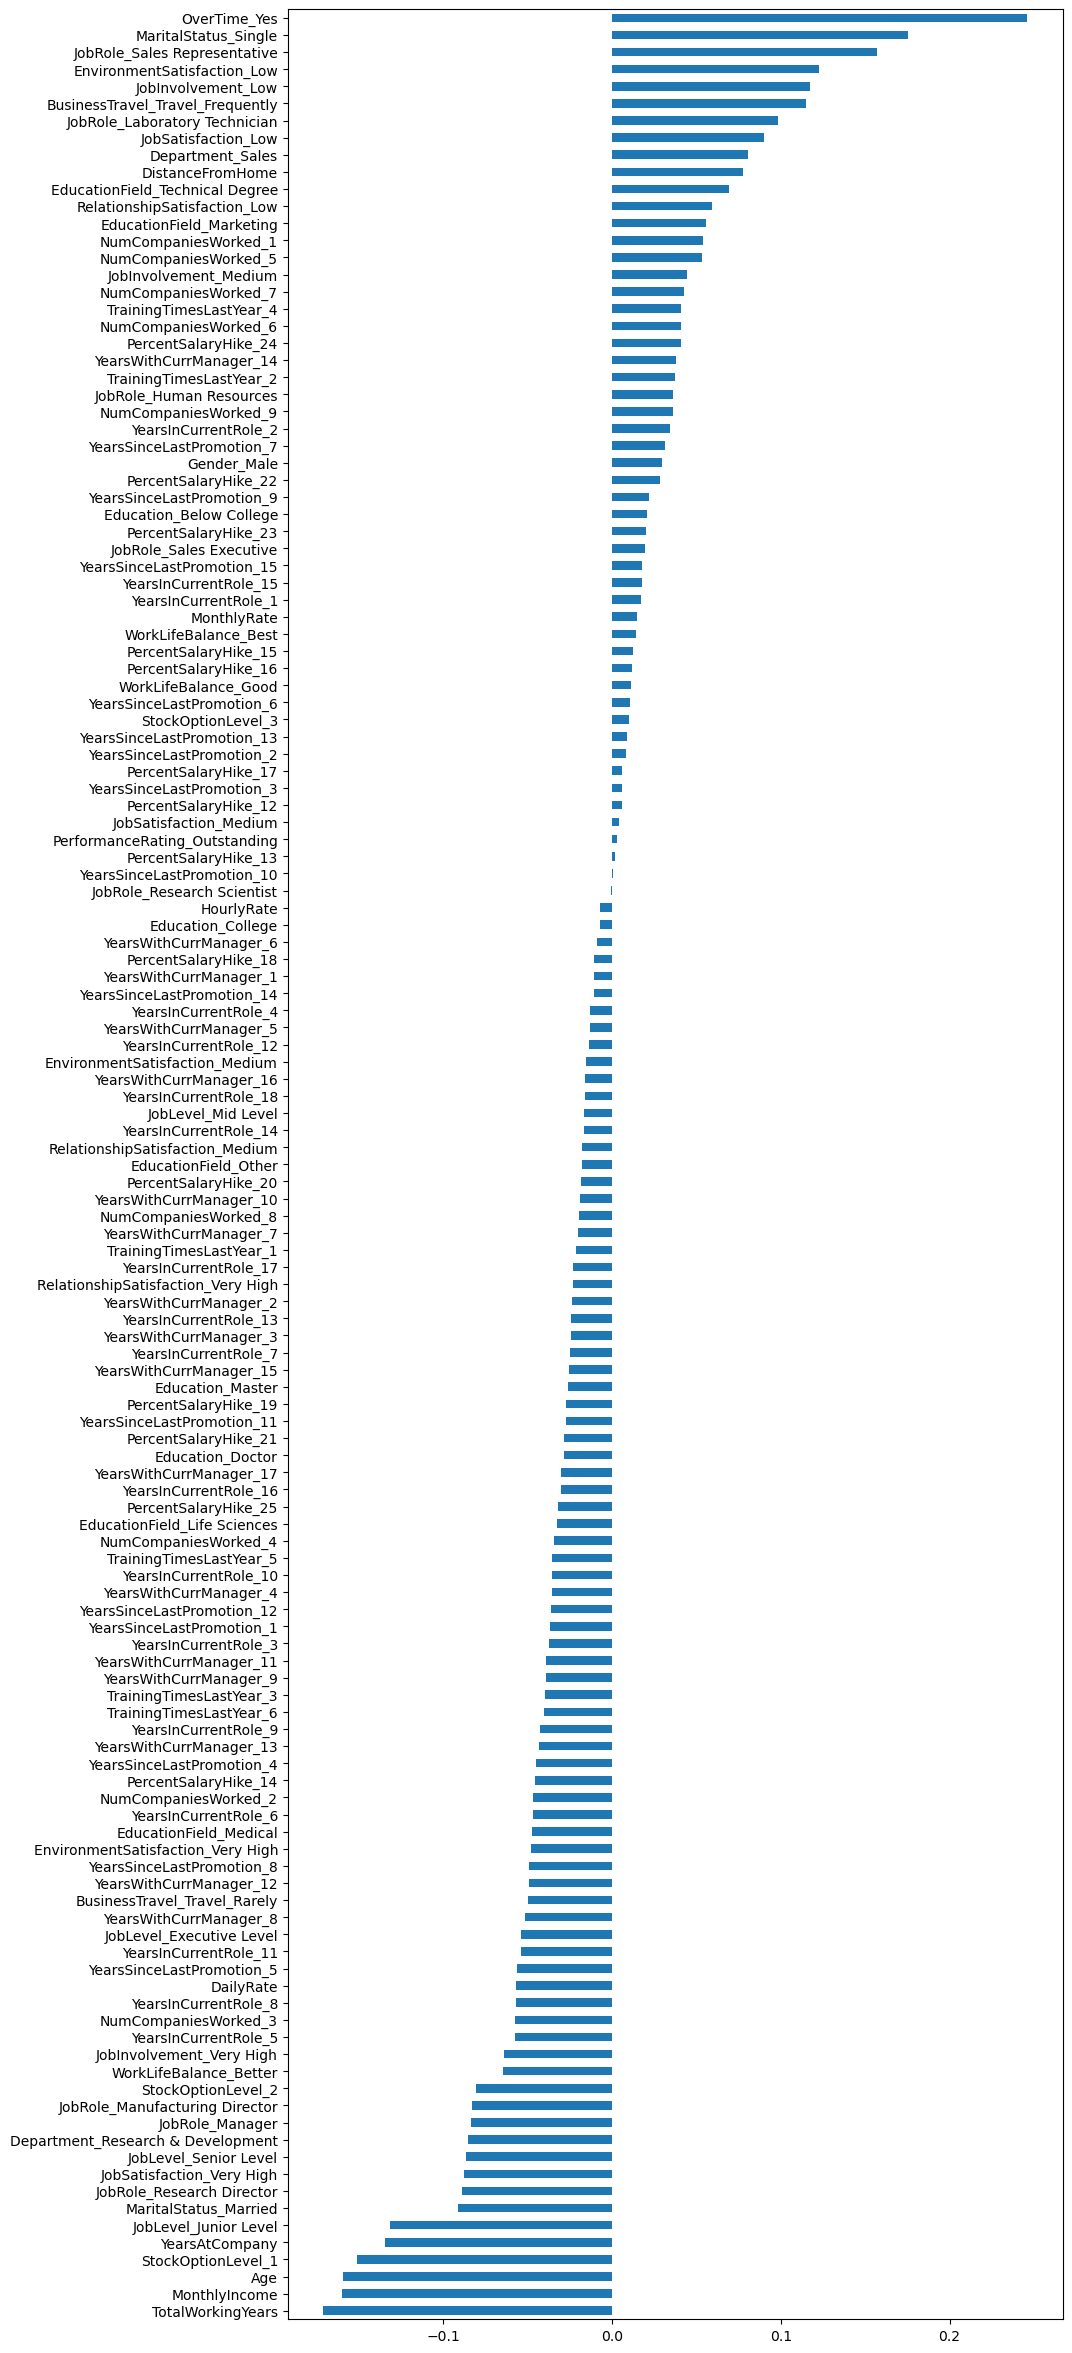

In [9]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [10]:
import numpy as np
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)


94

**TRAIN AND TEST DATASET**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [13]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [14]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [15]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [16]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [17]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[847  16]
 [ 59 107]]
ACCURACY SCORE:
0.9271
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.934879    0.869919  0.927114     0.902399      0.924399
recall       0.981460    0.644578  0.927114     0.813019      0.927114
f1-score     0.957603    0.740484  0.927114     0.849044      0.922577
support    863.000000  166.000000  0.927114  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[351  19]
 [ 41  30]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.895408   0.612245  0.863946    0.753827      0.849820
recall       0.948649   0.422535  0.863946    0.685592      0.863946
f1-score     0.921260   0.500000  0.863946    0.710630      0.853438
support    370.000000  71.000000  0.863946  441.000000    441.000000


**LOGISTIC REGRESSION**

In [18]:

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[847  16]
 [ 59 107]]
ACCURACY SCORE:
0.9271
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.934879    0.869919  0.927114     0.902399      0.924399
recall       0.981460    0.644578  0.927114     0.813019      0.927114
f1-score     0.957603    0.740484  0.927114     0.849044      0.922577
support    863.000000  166.000000  0.927114  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[351  19]
 [ 41  30]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.895408   0.612245  0.863946    0.753827      0.849820
recall       0.948649   0.422535  0.863946    0.685592      0.863946
f1-score     0.921260   0.500000  0.863946    0.710630      0.853438
support    370.000000  71.000000  0.863946  441.000000    441.000000


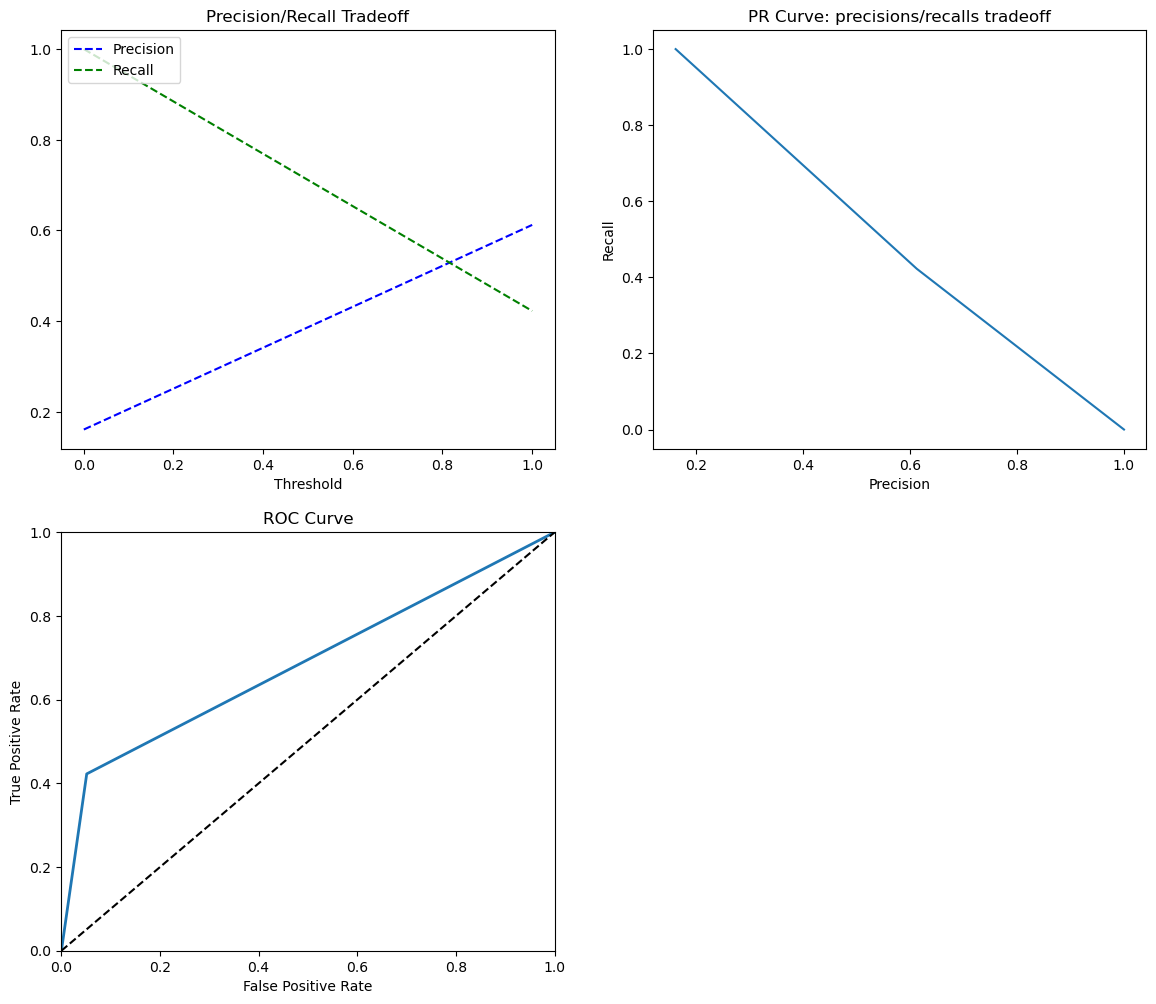

In [19]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [20]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

print(scores_dict)

{'Logistic Regression': {'Train': 0.553096511189602, 'Test': 0.549771602588504}}


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**RANDOM FOREST CLASSIFIER**

In [21]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[364   6]
 [ 62   9]]
ACCURACY SCORE:
0.8458
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.854460   0.600000  0.845805    0.727230      0.813493
recall       0.983784   0.126761  0.845805    0.555272      0.845805
f1-score     0.914573   0.209302  0.845805    0.561938      0.801026
support    370.000000  71.000000  0.845805  441.000000    441.000000


In [22]:
param_grid = dict(
    n_estimators= [100, 500, 900],
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4],
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1346 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dhar

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [113  53]]
ACCURACY SCORE:
0.8902
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.884221    1.000000  0.890185     0.942111      0.902899
recall       1.000000    0.319277  0.890185     0.659639      0.890185
f1-score     0.938554    0.484018  0.890185     0.711286      0.865227
support    863.000000  166.000000  0.890185  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[365   5]
 [ 65   6]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.848837   0.545455   0.84127    0.697146      0.799993
recall       0.986486   0.084507   0.84127    0.535497      0.841270
f1-score     0.912500   0.146341   0.84127    0.529421      0.789150
support    370.000000  71.000000   0.84127  441.000000    441.000000


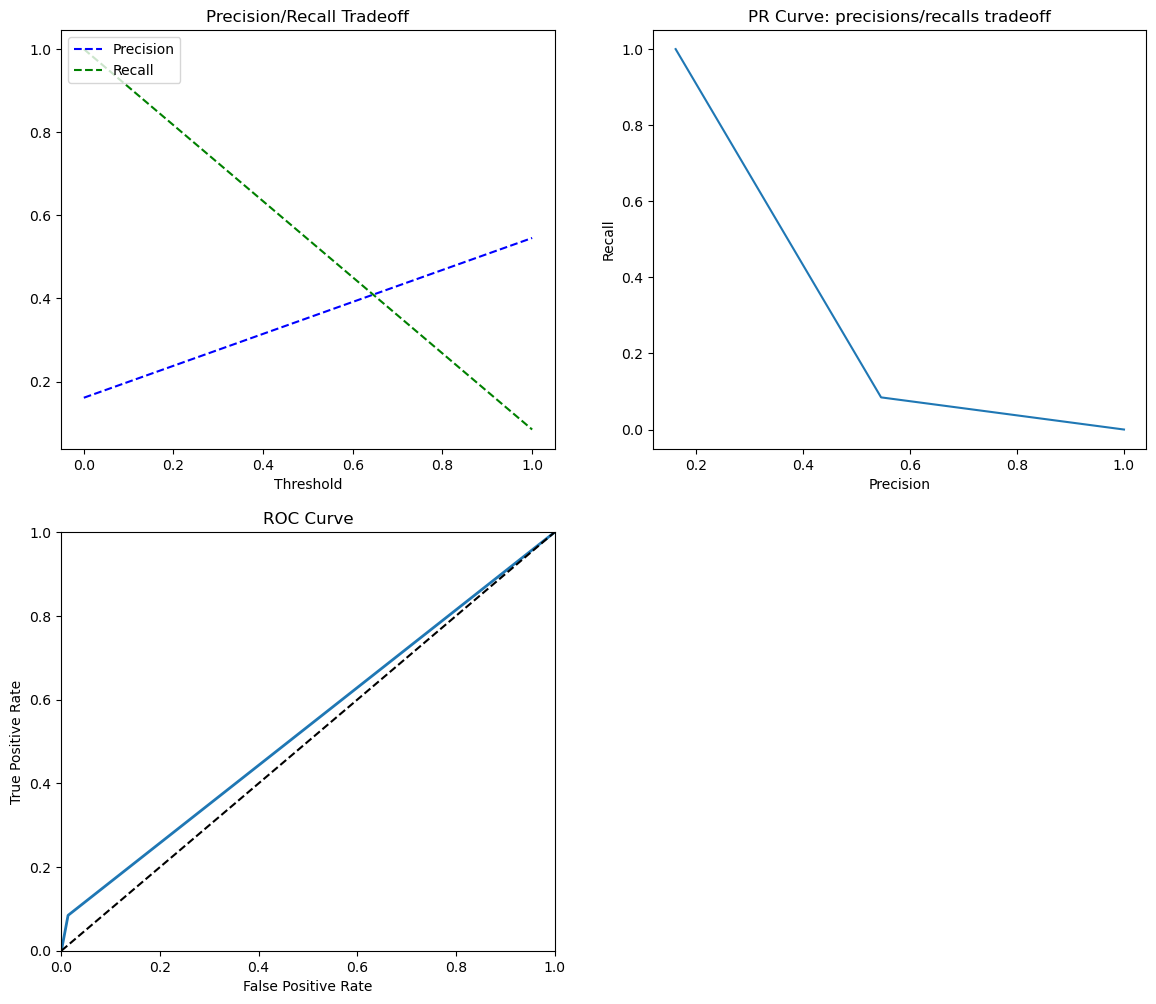

In [23]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [25]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }
print(scores_dict)

{'Logistic Regression': {'Train': 0.553096511189602, 'Test': 0.549771602588504}, 'Random Forest': {'Train': 0.6596385542168675, 'Test': 0.5354967643700038}}


Text(0.5, 1.0, 'Feature Importance according to Random Forest')

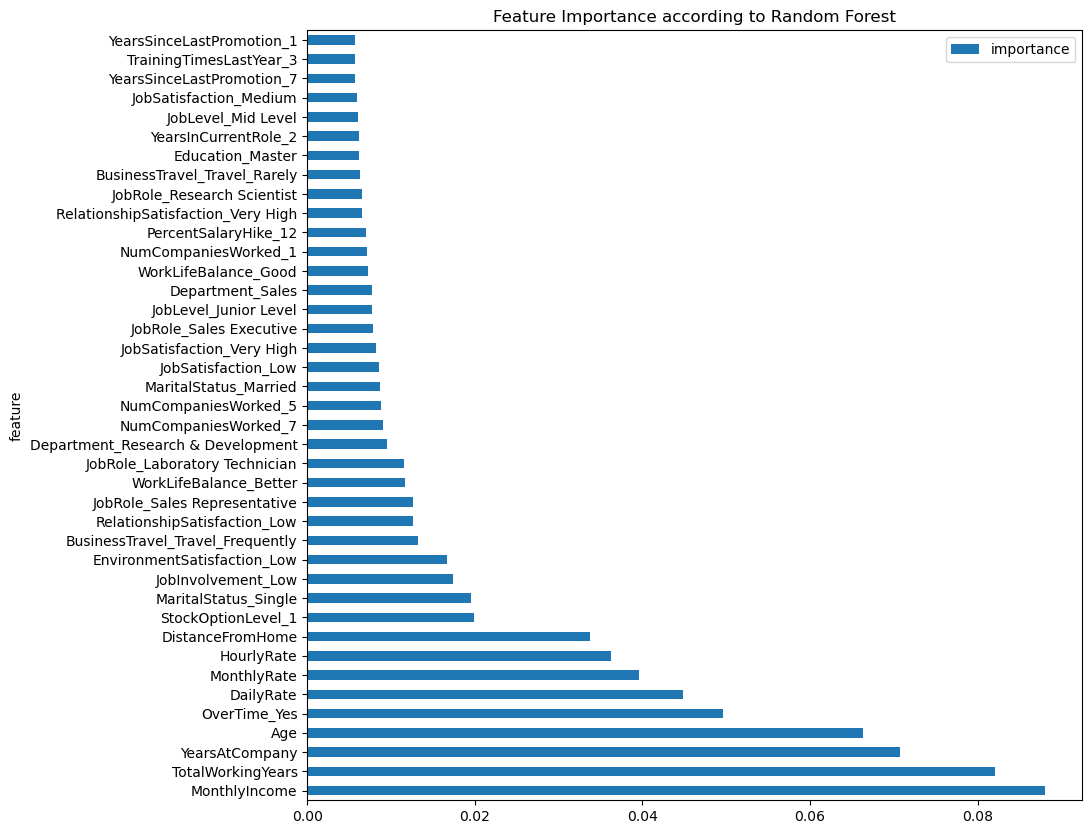

In [26]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

In [28]:
##SUPPORT VECTOR MACHINE

In [29]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 48 118]]
ACCURACY SCORE:
0.9456
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.946844    0.936508  0.945578     0.941676      0.945176
recall       0.990730    0.710843  0.945578     0.850787      0.945578
f1-score     0.968290    0.808219  0.945578     0.888255      0.942467
support    863.000000  166.000000  0.945578  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[347  23]
 [ 44  27]]
ACCURACY SCORE:
0.8481
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887468   0.540000  0.848073    0.713734      0.831526
recall       0.937838   0.380282  0.848073    0.659060      0.848073
f1-score     0.911958   0.446281  0.848073    0.679119      0.836985
support    370.000000  71.000000  0.848073  441.000000    441.000000


In [30]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [31]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[861   2]
 [ 65 101]]
ACCURACY SCORE:
0.9349
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.929806    0.980583  0.934888     0.955194      0.937997
recall       0.997683    0.608434  0.934888     0.803058      0.934888
f1-score     0.962549    0.750929  0.934888     0.856739      0.928410
support    863.000000  166.000000  0.934888  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 49  22]]
ACCURACY SCORE:
0.8662
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.880196   0.687500  0.866213    0.783848      0.849172
recall       0.972973   0.309859  0.866213    0.641416      0.866213
f1-score     0.924262   0.427184  0.866213    0.675723      0.844234
support    370.000000  71.000000  0.866213  441.000000    441.000000


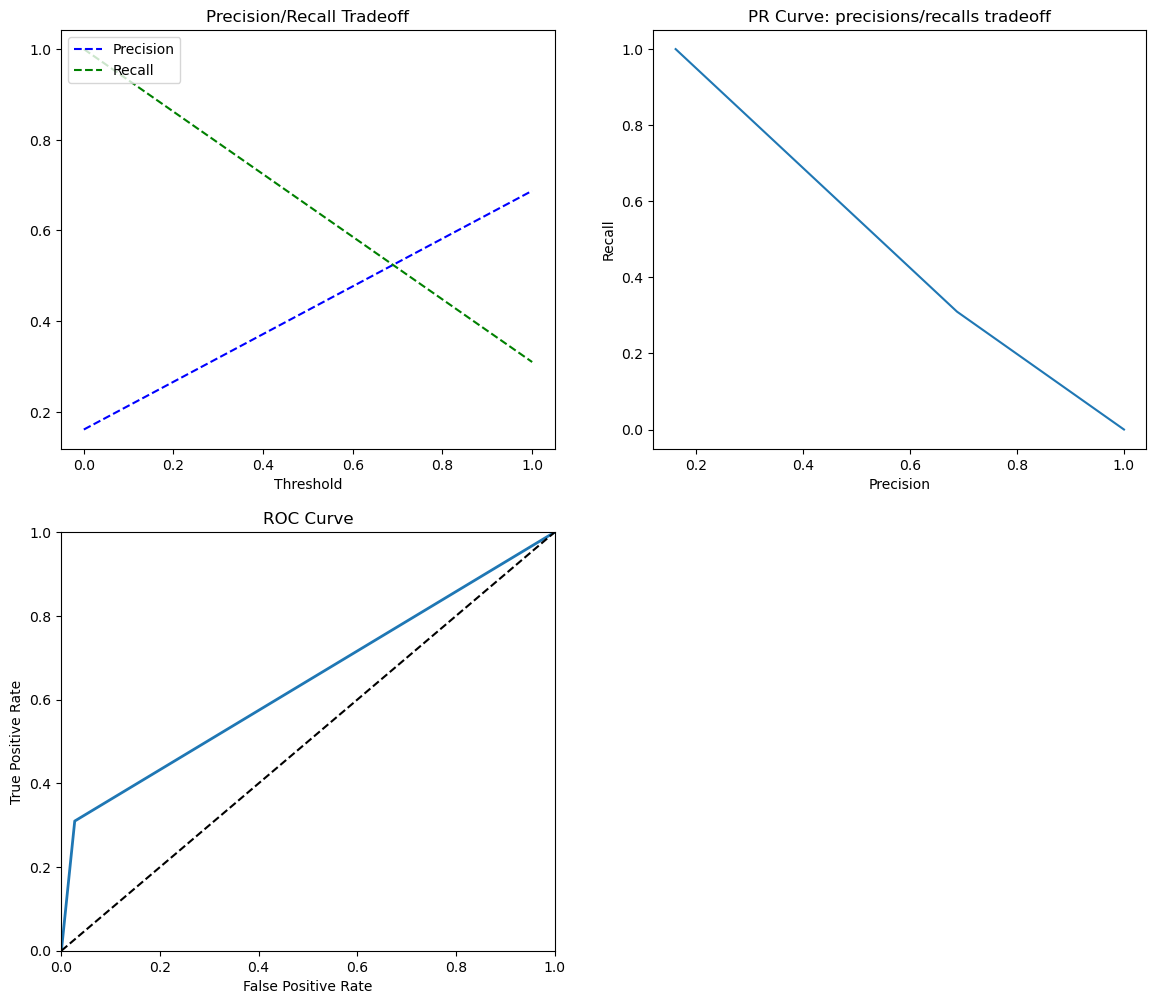

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [33]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }
print(scores_dict)

{'Logistic Regression': {'Train': 0.553096511189602, 'Test': 0.549771602588504}, 'Random Forest': {'Train': 0.6596385542168675, 'Test': 0.5354967643700038}, 'Support Vector Machine': {'Train': 0.8030581189183151, 'Test': 0.6414160639512753}}


In [34]:
#ADABOOST CLASSIFIER

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[846  17]
 [ 78  88]]
ACCURACY SCORE:
0.9077
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.915584    0.838095  0.907677     0.876840      0.903084
recall       0.980301    0.530120  0.907677     0.755211      0.907677
f1-score     0.946838    0.649446  0.907677     0.798142      0.898863
support    863.000000  166.000000  0.907677  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 50  21]]
ACCURACY SCORE:
0.8322
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.873737   0.466667    0.8322    0.670202      0.808200
recall       0.935135   0.295775    0.8322    0.615455      0.832200
f1-score     0.903394   0.362069    0.8322    0.632732      0.816242
support    370.000000  71.000000    0.8322  441.000000    441.000000


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


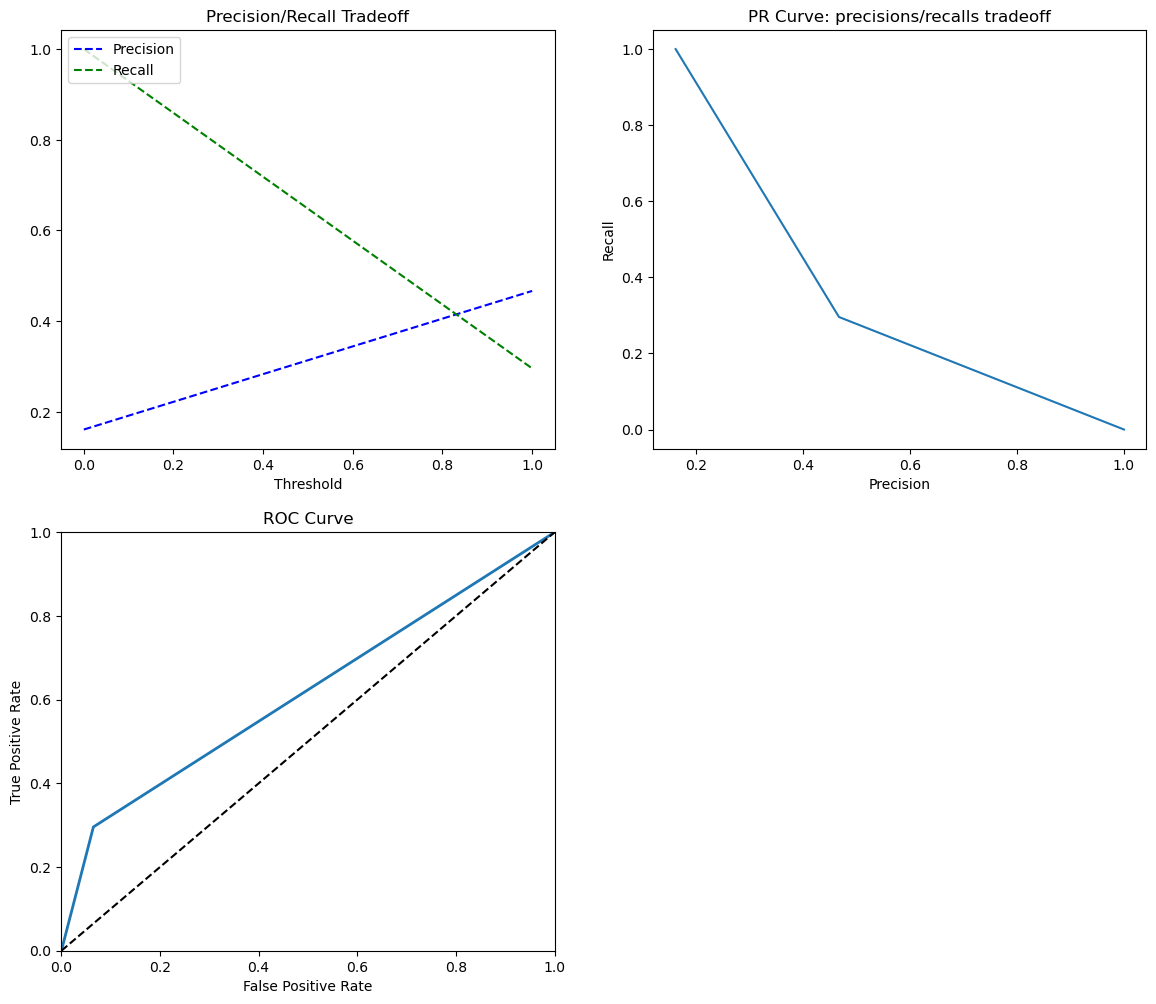

In [37]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [39]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),
    }
print(scores_dict)

{'Logistic Regression': {'Train': 0.553096511189602, 'Test': 0.549771602588504}, 'Random Forest': {'Train': 0.6596385542168675, 'Test': 0.5354967643700038}, 'Support Vector Machine': {'Train': 0.8030581189183151, 'Test': 0.6414160639512753}, 'AdaBoost': {'Train': 0.7552108782755588, 'Test': 0.6154548915112296}}


In [40]:
#COMPARING MODEL PERFORMANCE

In [41]:
ml_models = {
    'Random Forest': rf_clf,  
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.535
LOGISTIC REGRESSION            roc_auc_score: 0.550
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
ADABOOST                       roc_auc_score: 0.615


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


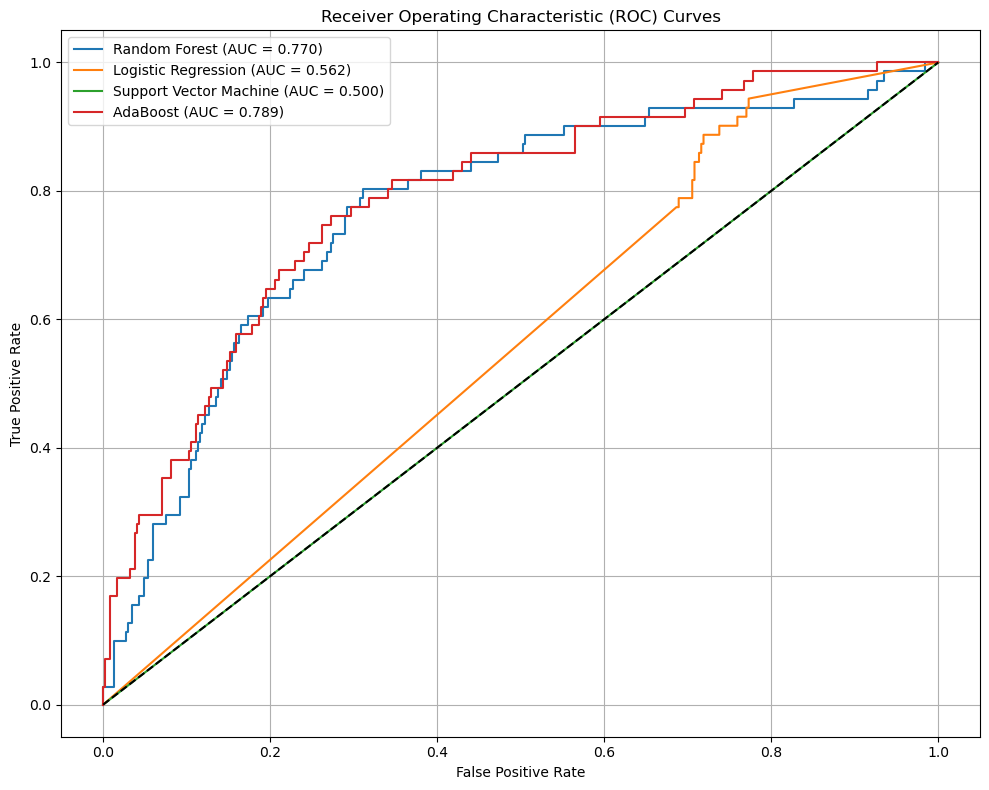

In [42]:
plt.figure(figsize=(10, 8))

# Iterate through each model
for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        # Predict probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [43]:
#REGRESSION ALGORITHM - L1&L2

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression

# 1. Generate sample data (replace with your own data loading)
X, y = make_regression(n_samples=100, n_features=20, noise=20, random_state=42)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Note: It is highly recommended to scale your features before using Ridge or Lasso, 
# as regularization is sensitive to the scale of input variables.

# --- RIDGE REGRESSION ---
# 3. Initialize the Ridge Regression model
# alpha=1.0 is the default value; you can tune this hyperparameter (e.g., alpha=0.1 or alpha=10)
ridge_model = Ridge(alpha=1.0)

# 4. Train the model
ridge_model.fit(X_train, y_train)

# 5. Make predictions and evaluate
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge) 
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
print(f"Ridge Regression MAE: {mae_ridge:.2f}")
print(f"Ridge Regression R2: {r2_ridge:.2f}")
print(f"Ridge Coefficients (first 5): {ridge_model.coef_[:5]}")
print("-" * 30)


# --- LASSO REGRESSION ---
# 3. Initialize the Lasso Regression model
# alpha=1.0 is the default value; higher alpha leads to more coefficients becoming zero
lasso_model = Lasso(alpha=1.0)

# 4. Train the model
lasso_model.fit(X_train, y_train)

# 5. Make predictions and evaluate
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso) 
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")
print(f"Lasso Regression MAE: {mae_lasso:.2f}")
print(f"Lasso Regression R2: {r2_lasso:.2f}")
# Notice how some coefficients might be exactly zero with Lasso
print(f"Lasso Coefficients (first 5): {lasso_model.coef_[:5]}")
print(f"Number of non-zero coefficients: {np.sum(lasso_model.coef_ != 0)}")


Ridge Regression MSE: 774.69
Ridge Regression RMSE: 27.83
Ridge Regression MAE: 22.15
Ridge Regression R2: 0.96
Ridge Coefficients (first 5): [ 4.63393524 91.04010101 40.46683156  1.11727557  1.96185364]
------------------------------
Lasso Regression MSE: 751.43
Lasso Regression RMSE: 27.41
Lasso Regression MAE: 21.99
Lasso Regression R2: 0.96
Lasso Coefficients (first 5): [ 2.63906493 91.22292803 39.89321509  0.13021188  0.        ]
Number of non-zero coefficients: 14


In [48]:
#K-Means Algorithm

0.08505265303438475


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharshini A\AppData\Local\Temp\ipykernel_5304\2535321089.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=20, cmap='viridis')


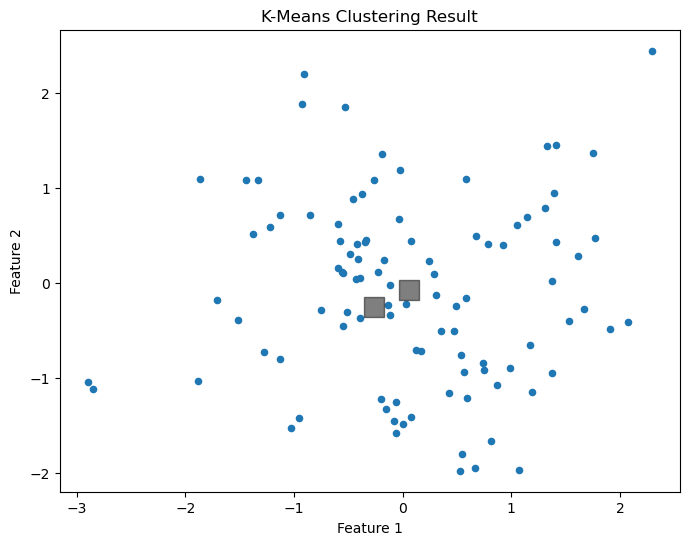

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='s')
sil_score = silhouette_score(X_test, y_kmeans)
print(sil_score)
plt.title('K-Means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores[k] = score
    print(f"k={k}, Silhouette Score={score:.4f}")


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

k=2, Silhouette Score=0.3076
k=3, Silhouette Score=0.3634
k=4, Silhouette Score=0.3583
k=5, Silhouette Score=0.3375
k=6, Silhouette Score=0.3500
k=7, Silhouette Score=0.3524


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
best_k = max(silhouette_scores, key=silhouette_scores.get)

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels = kmeans.fit_predict(X_pca)

final_score = silhouette_score(X_pca, labels)
print("Best k:", best_k)
print("Final Silhouette Score:", final_score)


Best k: 3
Final Silhouette Score: 0.3633619943585929


C:\Users\Dharshini A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


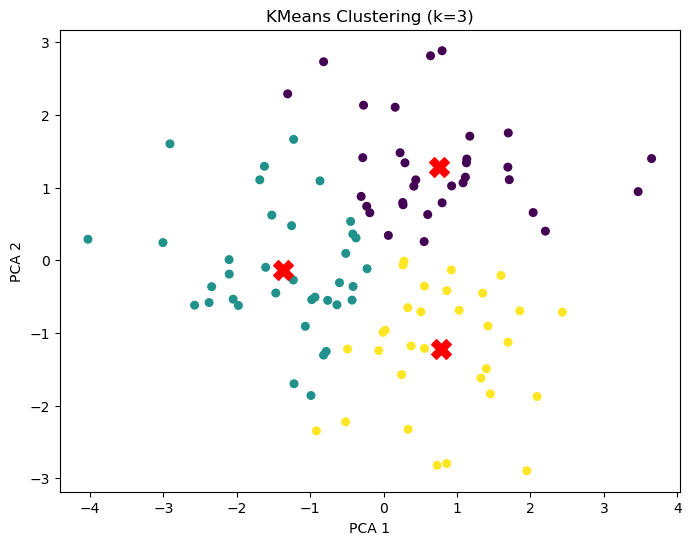

Final Silhouette Score: 0.3633619943585929


In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=30)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X')
plt.title(f'KMeans Clustering (k={best_k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
print("Final Silhouette Score:", final_score)